<a href="https://colab.research.google.com/github/Elberth-Git/ml_finishedprojects/blob/main/n%C3%A3o_finaliza_site_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = Yellow > Exércicio 4: Não finaliza site ?

DADOS PASSADO -> DESCOBRIR O FUTURO
DESCRIÇÃO:

CLASSIFICAÇÃO
SUPERVISIONADO
PREVISÃO

In [9]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Elberth-Git/ml_finishedprojects/main/projects.csv' #importação do banco de dados via URL
df = pd.read_csv(url) # Carregando os dados
print(df)

display(df.head(10))

      unfinished  expected_hours  price
0              1              26    192
1              1              88   9015
2              1              89   2577
3              1              42    275
4              1              39    170
...          ...             ...    ...
2152           0              80   7518
2153           1              52   1332
2154           0              40    473
2155           0              75   5324
2156           1              37    377

[2157 rows x 3 columns]


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [10]:
map = {
    'unfinished': 'incompleto',
    'expected_hours': 'horas_estimadas',
    'price': 'preço'
}

#legenda: 1 indica trabalhos incompletos, já 0 trabalhos completos

dados = df.rename(columns=map)
display(dados.head(200))

,incompleto,horas_estimadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
195,1,47,456
196,1,74,1399
197,1,98,17515
198,0,63,664


## <font color = Yellow> MODELOS DE CLASSIFICAÇÃO

### <font color = Orange> 1 - Linear SVC

In [12]:
from sklearn.model_selection import train_test_split

# Separando os recursos (X) e a variável alvo (y)
X = dados[['horas_estimadas', 'preço']]  # Incluindo 'unfinished' caso essa seja uma variável relevante
y = dados['incompleto']

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [13]:
from sklearn.svm import LinearSVC # Importando o modelo de Machine Learning (LinearSVC)

# Criando o modelo LinearSVC
model = LinearSVC(random=42)  # Cria uma instância do modelo LinearSVC

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y)  # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)

acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Acurácia do modelo: 54.44 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### <font color = Orange> 2 - DUMMY BASELINE

In [14]:
from sklearn.dummy import DummyClassifier

dummy_stratifield = DummyClassifier() #Cria modelo
dummy_stratifield.fit(train_x, train_y) #Treina modelo
dummy_stratifield.score(test_x, test_y) #Avalia modelo

acuracia_dummy = dummy_stratifield.score(test_x, test_y) * 100
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

A Acurácia do modelo dummy stratifield foi de 52.59 %


In [15]:
print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )  # Imprime a acurácia formatada como uma porcentagem com duas casas decimais)
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

Acurácia do modelo: 54.44 %
A Acurácia do modelo dummy stratifield foi de 52.59 %


# Plotando gráficos

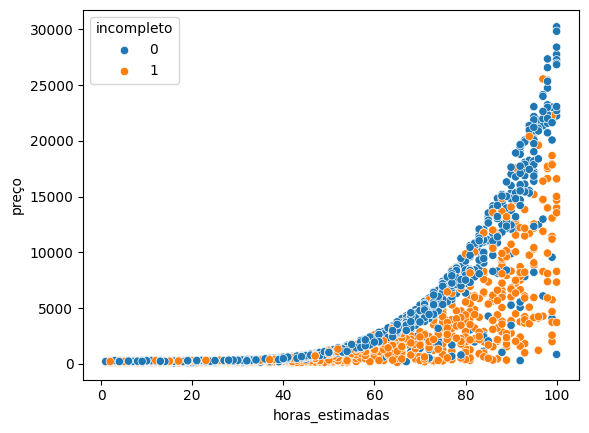

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='horas_estimadas', y='preço', hue=dados['incompleto'], data=dados)
plt.show()

### Gráficos separados

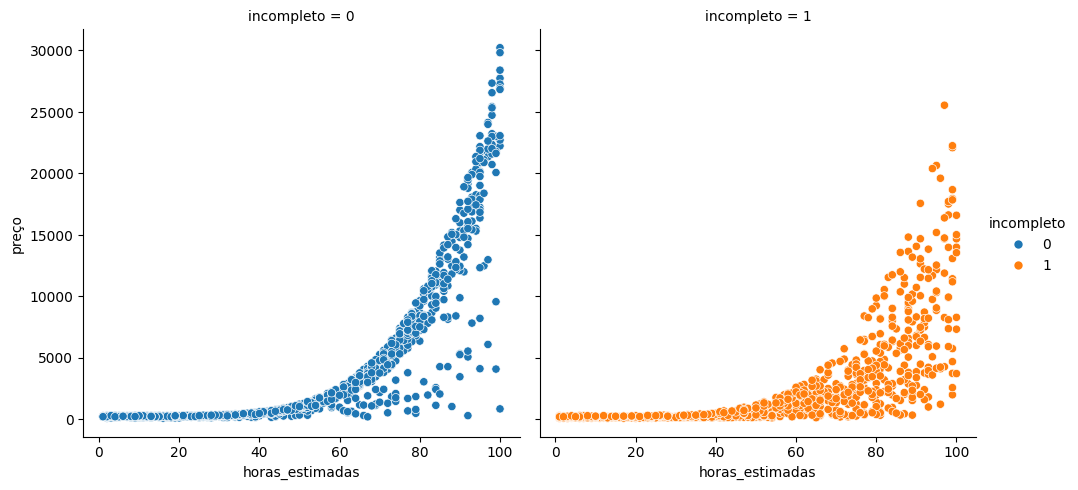

In [19]:
sns.relplot(x='horas_estimadas', y='preço', hue=dados['incompleto'], col="incompleto", data=dados)
plt.show()

1 100 102 29820


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


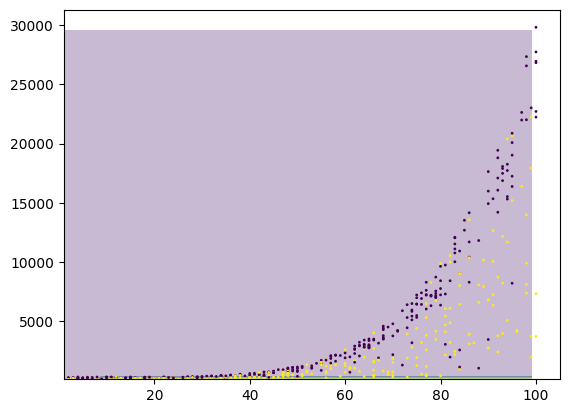

In [25]:
import numpy as np

x_min = test_x.horas_estimadas.min()
x_max = test_x.horas_estimadas.max()
y_min = test_x.preço.min()
y_max = test_x.preço.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_estimadas, test_x.preço, c=test_y, s=1)


# DECISION BOUNDARY



### <font color = Orange> SVC

In [49]:
from sklearn.model_selection import train_test_split # Importando a função para separar os dados em conjuntos de treinamento e teste
from sklearn.svm import SVC # Importando o modelo de Machine Learning (LinearSVC)

# Separando os recursos (X) e a variável alvo (y)
X = dados[['horas_estimadas', 'preço']]  # Incluindo 'unfinished' caso essa seja uma variável relevante
y = dados['incompleto']

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

# Criando o modelo LinearSVC
model = SVC(gamma="auto")  # Cria uma instância do modelo LinearSVC

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y)  # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)

acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acurácia do modelo: 57.41 %


1 100 102 29820


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


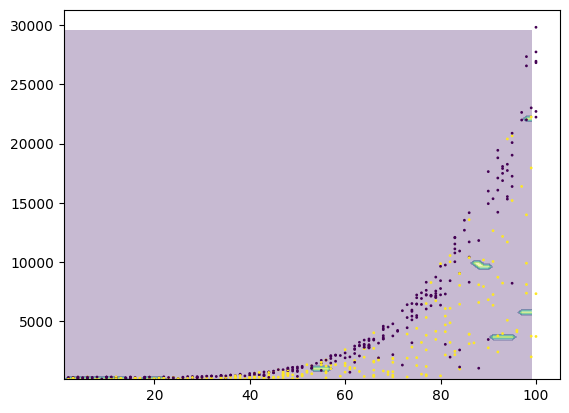

In [50]:
import numpy as np

x_min = test_x.horas_estimadas.min()
x_max = test_x.horas_estimadas.max()
y_min = test_x.preço.min()
y_max = test_x.preço.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_estimadas, test_x.preço, c=test_y, s=1)


# DECISION BOUNDARY

# modelo normalizado

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Importando a função para separar os dados em conjuntos de treinamento e teste
from sklearn.svm import SVC # Importando o modelo de Machine Learning (LinearSVC)
from sklearn.metrics import accuracy_score

# Separando os recursos (X) e a variável alvo (y)
X = dados[['horas_estimadas', 'preço']]  # Incluindo 'unfinished' caso essa seja uma variável relevante
y = dados['incompleto']

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE
raw_train_x, raw_test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

# Padronizando os dados
scaler = StandardScaler()
train_x = scaler.fit_transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# Criando o modelo LinearSVC
model_ = SVC(gamma="auto", random_state=42)  # Cria uma instância do modelo LinearSVC

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y)  # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)
acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acurácia do modelo: 69.44 %


-1.7012347803371175 1.769684854913979 -0.5866100555585273 5.504788294726791


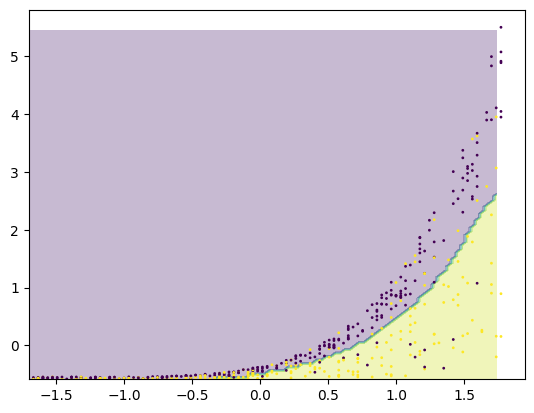

In [57]:
import numpy as np

data_x = test_x[:,0]
data_y = test_x[:,1]


x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)


# DECISION BOUNDARY

### <font color = Orange> 2 - DUMMY BASELINE

In [58]:
from sklearn.dummy import DummyClassifier

dummy_stratifield = DummyClassifier() #Cria modelo
dummy_stratifield.fit(raw_train_x, train_y) #Treina modelo
dummy_stratifield.score(raw_test_x, test_y) #Avalia modelo

acuracia_dummy = dummy_stratifield.score(test_x, test_y) * 100
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

A Acurácia do modelo dummy stratifield foi de 52.59 %


In [59]:
print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )  # Imprime a acurácia formatada como uma porcentagem com duas casas decimais)
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

Acurácia do modelo: 69.44 %
A Acurácia do modelo dummy stratifield foi de 52.59 %
